In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

## Network
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import pylab as plt 
from itertools import count 
from operator import itemgetter 
from networkx.drawing.nx_agraph import graphviz_layout 
import pylab

In [ ]:
df = pd.read_csv('member-edges.csv')
print(len(df))

74725


In [ ]:
df = df[0 : 1000]

/usr/local/lib/python3.9/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


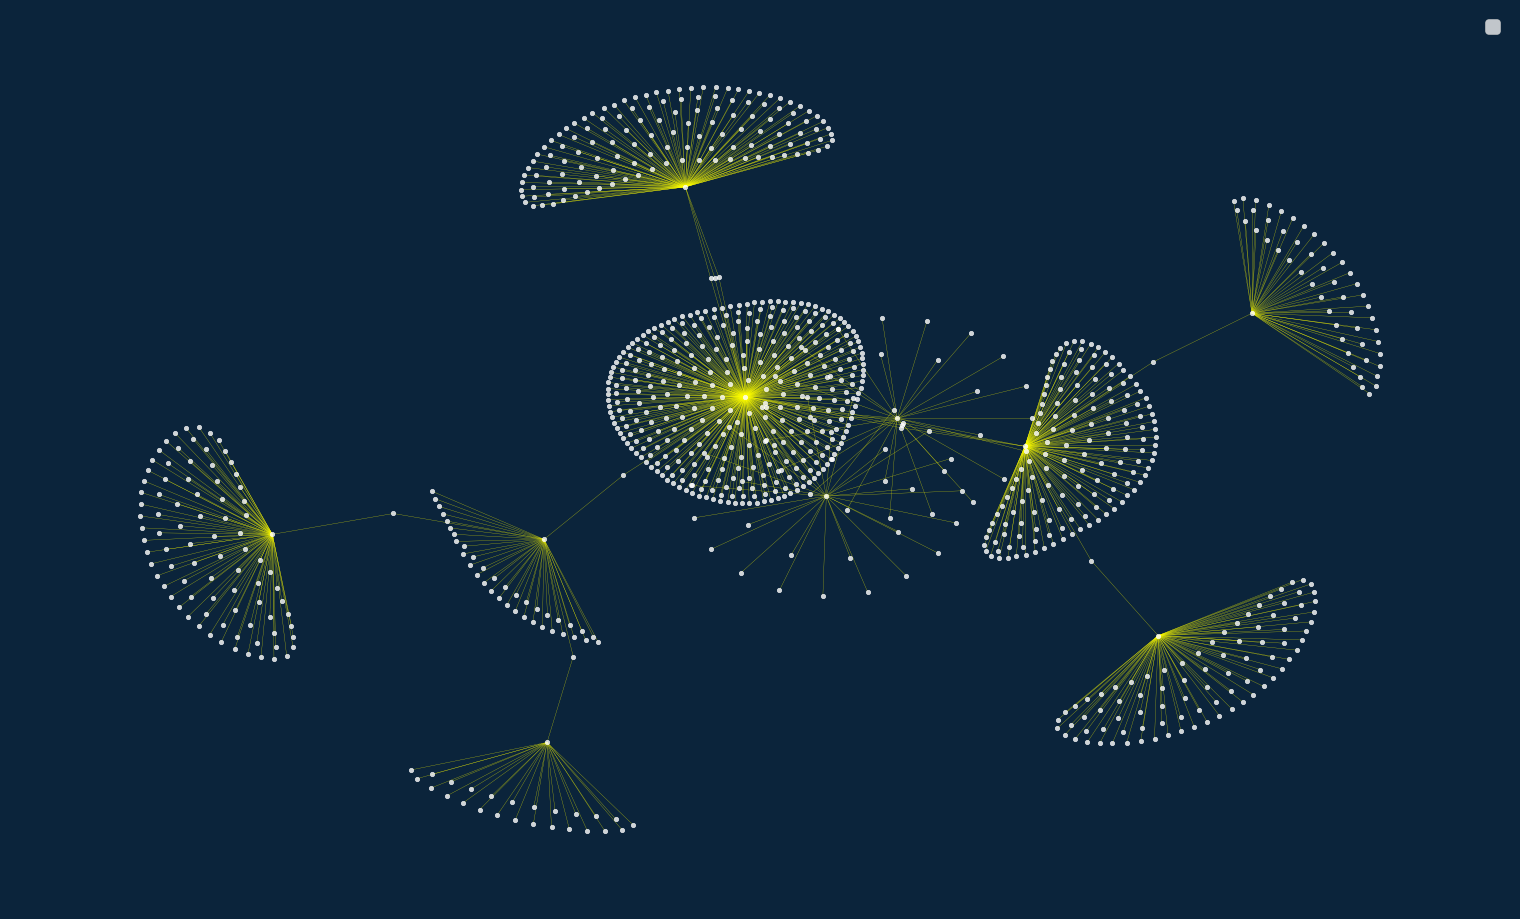

In [ ]:
pd.set_option("display.max_columns", 100)
G = nx.from_pandas_edgelist(df, 'member1', 'member2', create_using = nx.Graph())

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]
#size = [(degree[n]) for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (15,9), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 10, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')

plt.legend()
plt.show()

In [ ]:
for i in sorted(G.nodes()):
    G.nodes[i]['Degree'] = G.degree(i)


#extraction of network nodes in a dataframe
nodes_data = pd.DataFrame([i[1] for i in G.nodes(data=True)], index=[i[0] for i in G.nodes(data=True)])
nodes_data = nodes_data.sort_values(by='Degree',ascending= False)
nodes_data.index.names=['ID']
nodes_data.reset_index(level=0, inplace=True)


# Betweenness centrality 
bet_cen = nx.betweenness_centrality(G)
df_bet_cen = pd.DataFrame.from_dict(bet_cen, orient='index')
df_bet_cen.columns = ['betweenness_centrality']
df_bet_cen.index.names = ['ID']
df_bet_cen.reset_index(level=0, inplace=True)
analyse= pd.merge(nodes_data,df_bet_cen, on = ['ID'])

print(analyse)

              ID  Degree  betweenness_centrality
0    234684445.0     359                0.756940
1    226754592.0     154                0.453789
2    216072216.0     137                0.235007
3    183566364.0      88                0.156686
4     73498632.0      88                0.156686
..           ...     ...                     ...
994   39322832.0       1                0.000000
995   12771542.0       1                0.000000
996   55746782.0       1                0.000000
997  174031072.0       1                0.000000
998  231246833.0       1                0.000000

[999 rows x 3 columns]
